In [ ]:
#installing dependencies
!pip install eli5
!pip install fitter
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 7.7 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=e73267bcef4046b943c984174168947a142e1badbf42bbc9777ca0da4806fd4c
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatib

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from fitter import Fitter, get_common_distributions, get_distributions
import shap
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Reading the dataset
data=pd.read_csv("https://raw.githubusercontent.com/Nupoor1998/DataScience_Assignment1/main/indian_liver_patient.csv")

In [ ]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
num_cols = data._get_numeric_data().columns
num_cols, len(num_cols)

(Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
        'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
        'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset'],
       dtype='object'), 10)

In [ ]:
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
cat_cols, len(cat_cols)

(['Gender'], 1)

In [ ]:
# converting
for cat_col in cat_cols:
  classes = list(np.unique(data[cat_col]))
  tokens = []
  i = 0
  for c in classes:
    tokens.append(i)
    i += 1

  data[cat_col].replace(classes, tokens, inplace=True)

In [ ]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
#checking if the any data is missing
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 11.41it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
norm             0.013009   981.956970 -6231.355588     inf      0.055289   
gamma            0.013009   983.435224 -6224.982175     inf      0.055369   
lognorm          0.013011   983.054808 -6224.904439     inf      0.055008   
rayleigh         0.014282   940.244739 -6176.952898     inf      0.126523   
cauchy           0.014854  1008.256622 -6154.065014     inf      0.100942   

             ks_pvalue  
norm      5.452234e-02  
gamma     5.395652e-02  
lognorm   5.654127e-02  
rayleigh  1.354939e-08  
cauchy    1.265283e-05  


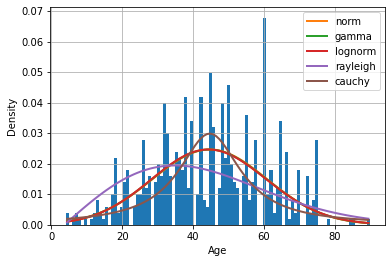

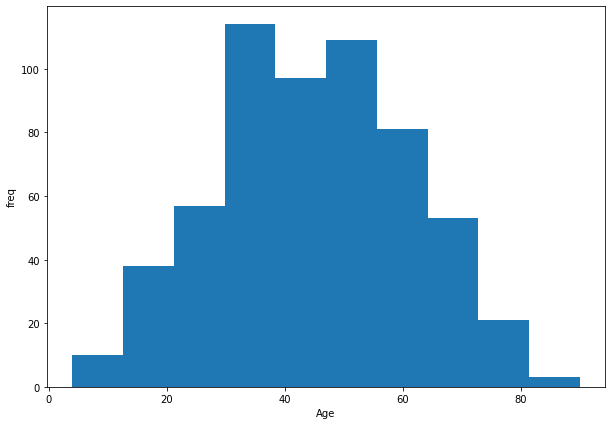

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 12.38it/s]


         sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm         0.030674  1592.309499 -5724.921974     inf      0.164416   
cauchy          0.036985  1773.843609 -5622.204647     inf      0.270669   
chi2            0.170601  2046.554481 -4724.541379     inf      0.242368   
expon           0.225749  2790.338614 -4567.614694     inf      0.341211   
gamma           0.230392  1977.041054 -4549.375789     inf      0.587399   

             ks_pvalue  
lognorm   3.061871e-14  
cauchy    3.220203e-38  
chi2      1.241668e-30  
expon     4.344562e-61  
gamma    5.977878e-192  


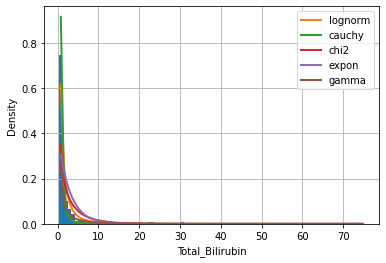

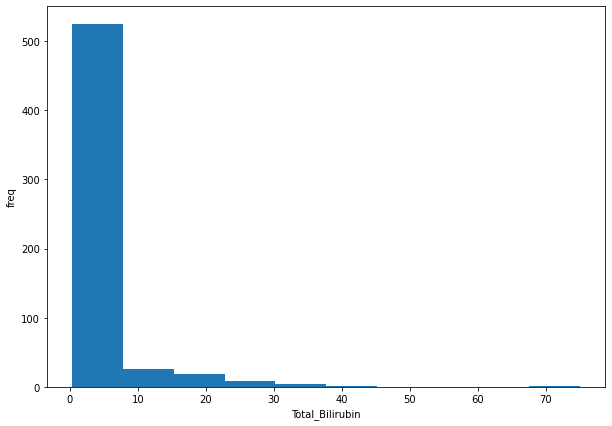

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 10.60it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
cauchy           0.374478  1377.262749 -4272.552423     inf      0.326734   
exponpow         1.412264   996.861673 -3492.300516     inf      0.225739   
chi2             1.876501   877.316451 -3326.603079     inf      0.181050   
gamma            1.885273   882.767387 -3323.884074     inf      0.213073   
lognorm          2.348587  1088.503968 -3195.775124     inf      0.567064   

              ks_pvalue  
cauchy     6.370382e-56  
exponpow   1.379663e-26  
chi2       3.408205e-17  
gamma      1.046466e-23  
lognorm   1.312431e-177  


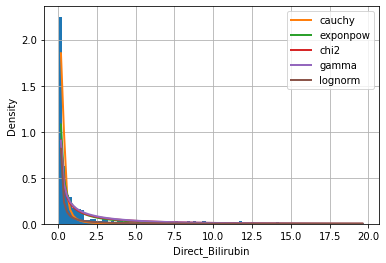

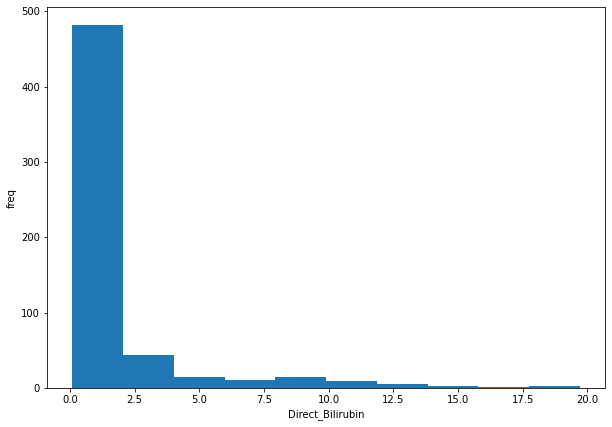

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 11.50it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
cauchy           0.000021  2053.301787 -9966.780838     inf      0.154231   
lognorm          0.000041  2101.745527 -9585.463152     inf      0.117839   
rayleigh         0.000096  2873.482069 -9091.590493     inf      0.276288   
expon            0.000101  1988.975572 -9061.322013     inf      0.232164   
norm             0.000112  2954.003351 -9002.762749     inf      0.254174   

             ks_pvalue  
cauchy    1.414773e-12  
lognorm   1.643824e-07  
rayleigh  7.860105e-40  
expon     4.095386e-28  
norm      1.089886e-33  


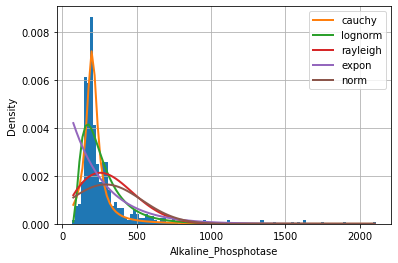

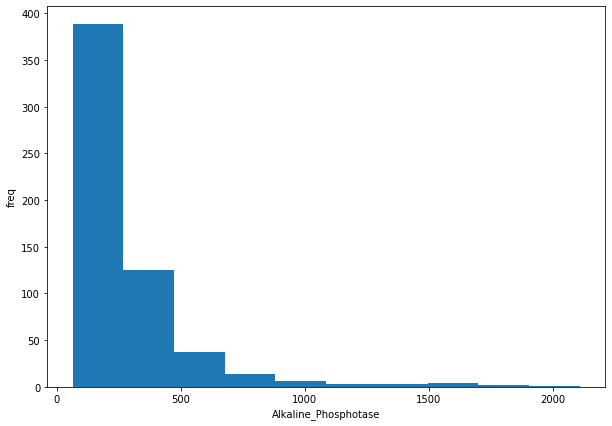

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 10.27it/s]


          sumsquare_error          aic           bic  kl_div  ks_statistic  \
lognorm          0.000012  2359.093376 -10292.488961     inf      0.067764   
cauchy           0.000044  2338.540315  -9545.569067     inf      0.188400   
chi2             0.000094  2756.507677  -9097.410802     inf      0.218006   
expon            0.000100  3669.898113  -9066.746136     inf      0.248944   
exponpow         0.000243  1753.729200  -8546.514882     inf      0.361385   

             ks_pvalue  
lognorm   9.007382e-03  
cauchy    1.362536e-18  
chi2      8.291845e-25  
expon     2.572473e-32  
exponpow  1.044094e-68  


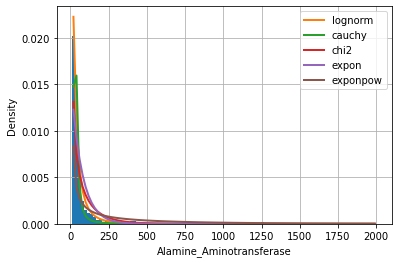

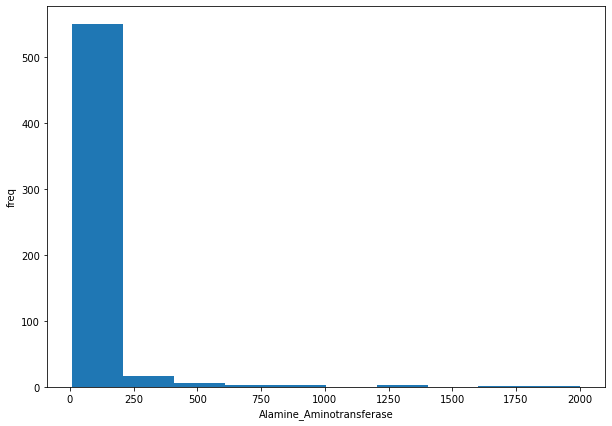

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 11.57it/s]


         sumsquare_error          aic           bic  kl_div  ks_statistic  \
lognorm         0.000002  2742.494599 -11407.956266     inf      0.058452   
cauchy          0.000019  2641.881901 -10042.848480     inf      0.210994   
expon           0.000036  5848.246931  -9661.584753     inf      0.262444   
gamma           0.000043  3621.025259  -9561.788048     inf      0.169435   
chi2            0.000067  2526.627236  -9300.448016     inf      0.243637   

            ks_pvalue  
lognorm  3.575135e-02  
cauchy   2.991059e-23  
expon    6.373287e-36  
gamma    4.221407e-15  
chi2     5.927826e-31  


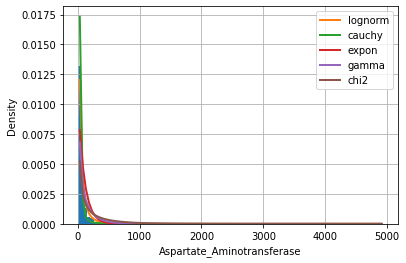

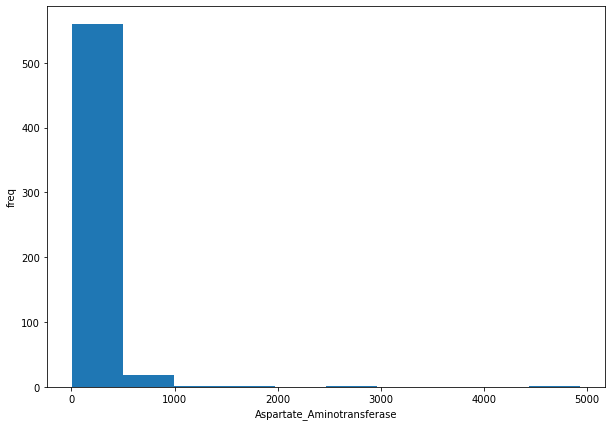

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 13.34it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
norm             2.319694  550.739824 -3209.359956     inf      0.064302   
lognorm          2.322136  554.739490 -3202.378295     inf      0.066889   
gamma            2.334974  558.338261 -3199.164034     inf      0.072399   
chi2             2.339426  556.252203 -3198.053552     inf      0.070131   
exponpow         2.393573  544.762218 -3184.713670     inf      0.068952   

          ks_pvalue  
norm       0.015398  
lognorm    0.010343  
gamma      0.004204  
chi2       0.006142  
exponpow   0.007445  


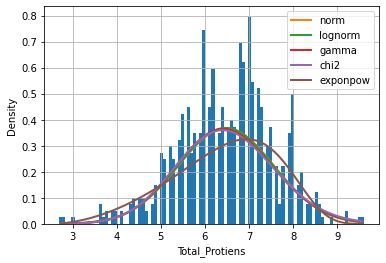

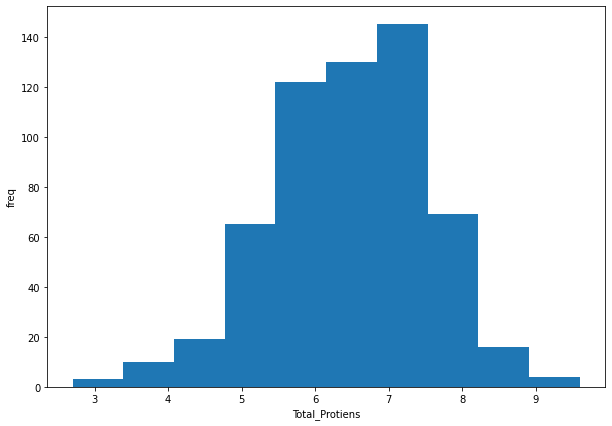

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 14.49it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
exponpow        10.500898  438.183074 -2322.646958     inf      0.061170   
norm            10.509737  421.483523 -2328.524582     inf      0.059764   
gamma           10.511486  422.863859 -2322.059417     inf      0.059887   
lognorm         10.513048  423.914793 -2321.972784     inf      0.060289   
chi2            10.530186  422.526545 -2321.023146     inf      0.061640   

          ks_pvalue  
exponpow   0.024417  
norm       0.029806  
gamma      0.029295  
lognorm    0.027680  
chi2       0.022818  


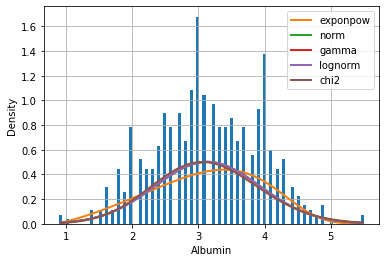

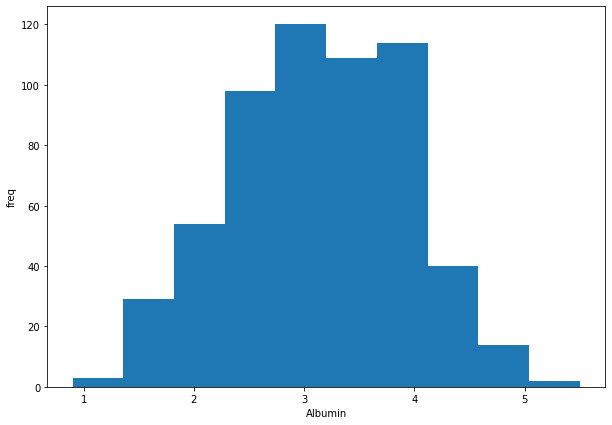

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 79.39it/s]


         sumsquare_error  aic  bic  kl_div  ks_statistic  ks_pvalue
chi2                 inf  inf  inf     inf           NaN        NaN
cauchy               inf  inf  inf     inf           NaN        NaN
expon                inf  inf  inf     inf           NaN        NaN
gamma                inf  inf  inf     inf           NaN        NaN
lognorm              inf  inf  inf     inf           NaN        NaN


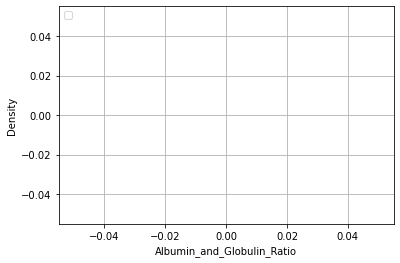

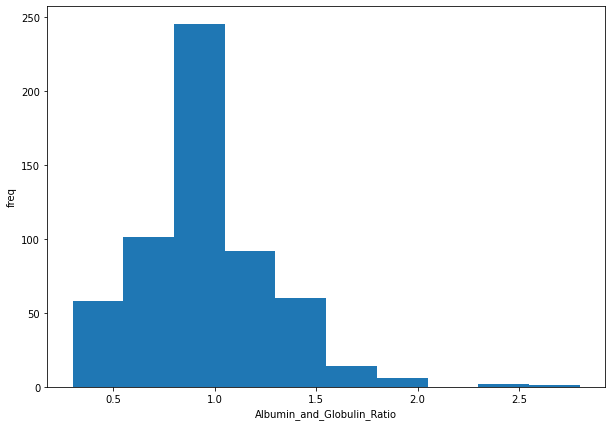

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 12.73it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
gamma         3645.162940  495.585376  1087.725582     inf      0.712543   
exponpow      4248.446922  253.971910  1177.013442     inf      0.713100   
chi2          4659.246032  139.705383  1230.824431     inf      0.713551   
powerlaw      5507.351249   23.613939  1328.319609     inf      0.713551   
expon         5590.646471  103.063122  1330.702916     inf      0.713551   

              ks_pvalue  
gamma     2.238614e-299  
exponpow  6.068075e-300  
chi2      2.110550e-300  
powerlaw  2.110374e-300  
expon     2.110374e-300  


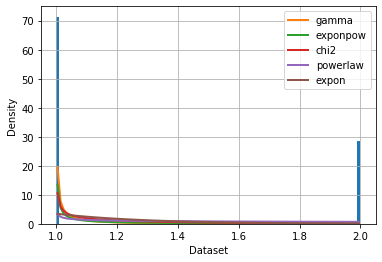

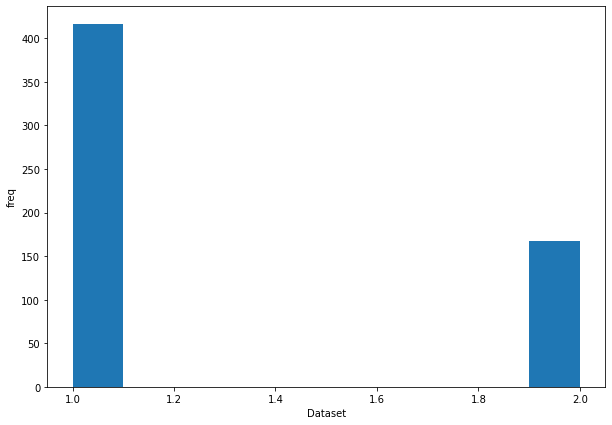

In [ ]:
cols = data.drop(columns = ['Gender'])


for col in cols:

  col_vs = data[col].values
  f = Fitter(col_vs, distributions=get_common_distributions())
  f.fit()
  print(f.summary())
  plt.ylabel("Density")
  plt.xlabel(f"{col}")

  col_list = data[col].to_list()
  fig, ax = plt.subplots(figsize =(10, 7))
  ax.hist(col_list) #, bins = [0, 25, 50, 75, 100])

  plt.xlabel(f"{col}")
  plt.ylabel("freq")
  plt.show()

In [ ]:
from sklearn import preprocessing

print(data.columns)

x = data.drop(columns = cat_cols)
x = x.drop(columns=['Dataset'])

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
print(x_scaled)

num_cols_ = num_cols[:-1]
print(x_scaled.shape, len(num_cols), num_cols)

data_norm = pd.DataFrame(data=x_scaled, columns=num_cols_)
data_norm['Dataset'] = data['Dataset']

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')
[[0.70930233 0.00402145 0.         ... 0.5942029  0.52173913 0.24      ]
 [0.6744186  0.14075067 0.2755102  ... 0.69565217 0.5        0.176     ]
 [0.6744186  0.0924933  0.20408163 ... 0.62318841 0.52173913 0.236     ]
 ...
 [0.55813953 0.00536193 0.00510204 ... 0.53623188 0.5        0.28      ]
 [0.31395349 0.01206434 0.02040816 ... 0.5942029  0.54347826 0.28      ]
 [0.39534884 0.0080429  0.01020408 ... 0.66666667 0.76086957 0.48      ]]
(583, 9) 10 Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')


In [ ]:
data_norm.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0.709302,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240,1
1,0.674419,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176,1
2,0.674419,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236,1
3,0.627907,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280,1
4,0.790698,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040,1


In [ ]:
data_norm.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,0.473792,0.038858,0.070720,0.111176,0.035534,0.020311,0.548288,0.487359,0.258826,1.286449
std,0.188254,0.083238,0.143291,0.118680,0.091769,0.058735,0.157312,0.172939,0.127837,0.452490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.337209,0.005362,0.005102,0.054958,0.006533,0.003049,0.449275,0.369565,0.160000,1.000000
50%,0.476744,0.008043,0.010204,0.070835,0.012563,0.006505,0.565217,0.478261,0.252000,1.000000
75%,0.627907,0.029491,0.061224,0.114802,0.025377,0.015654,0.652174,0.630435,0.320000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [ ]:
data_norm.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,-0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,-0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,-0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,-0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,-0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,-0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131
Dataset,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.163131,1.000000


In [ ]:
f_data = pd.concat([data_norm, data[cat_cols]], axis=1)

In [ ]:
f_data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender
0,0.709302,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240,1,0
1,0.674419,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176,1,1
2,0.674419,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236,1,1
3,0.627907,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280,1,1
4,0.790698,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040,1,1


In [ ]:
f_data.corr()['Dataset']

Age                          -0.137351
Total_Bilirubin              -0.220208
Direct_Bilirubin             -0.246046
Alkaline_Phosphotase         -0.184866
Alamine_Aminotransferase     -0.163416
Aspartate_Aminotransferase   -0.151934
Total_Protiens                0.035008
Albumin                       0.161388
Albumin_and_Globulin_Ratio    0.163131
Dataset                       1.000000
Gender                       -0.082416
Name: Dataset, dtype: float64

In [ ]:
#['Age','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Albumin','Albumin_and_Globulin_Ratio']


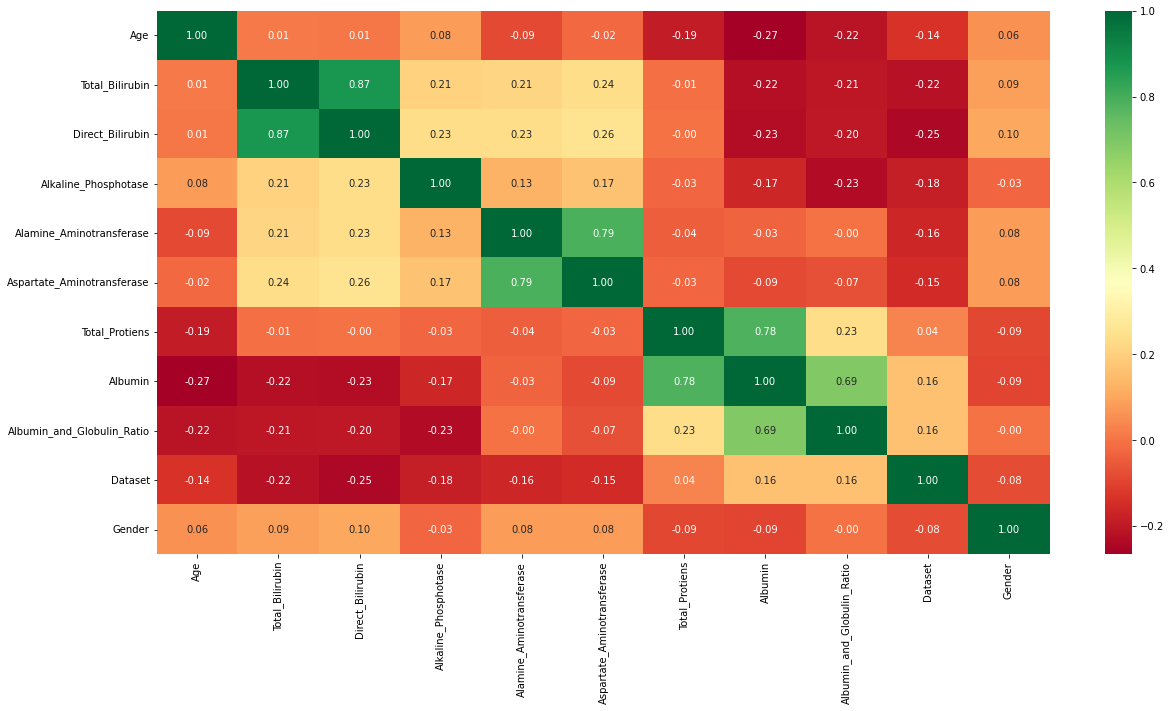

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(f_data.corr(), annot =True, cmap = "RdYlGn", fmt= '.2f')

In [ ]:
from sklearn.model_selection import train_test_split
X = f_data.drop(columns=['Dataset'])
y = f_data['Dataset']
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Dataset, Length: 583, dtype: int64


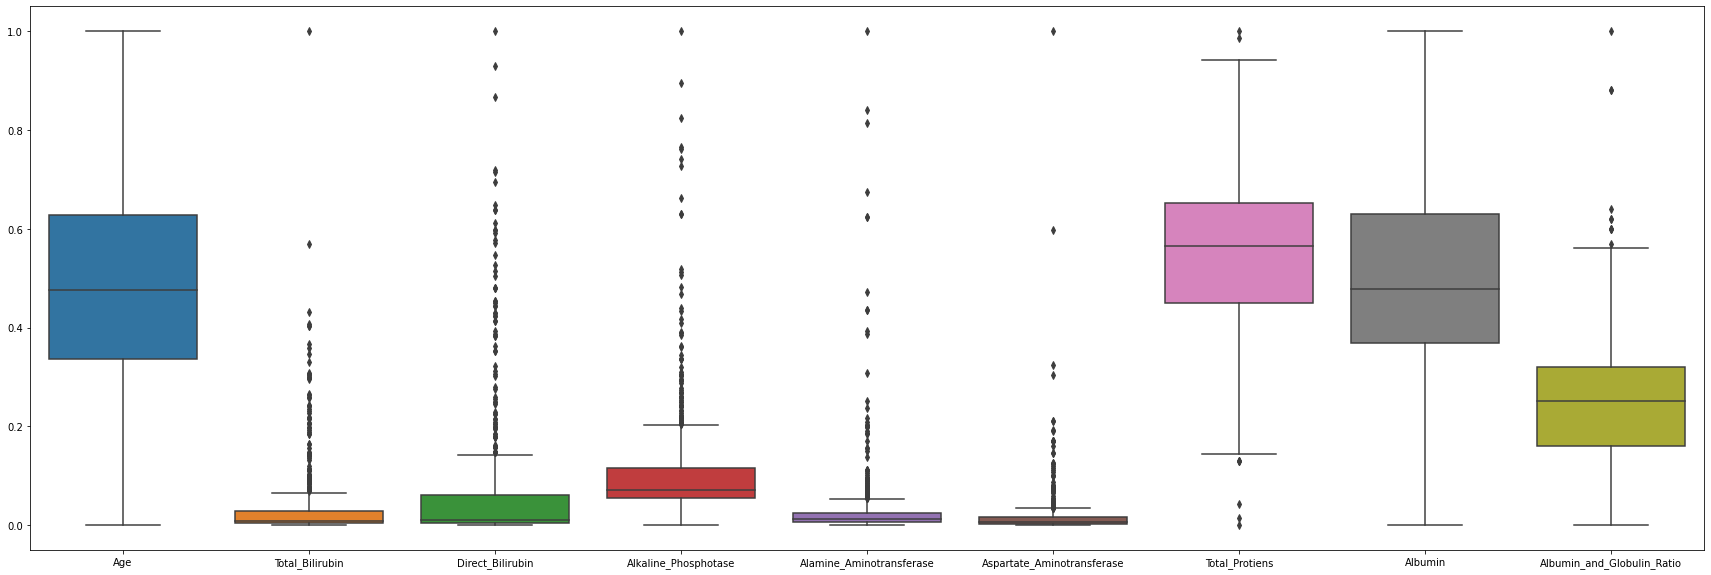

In [ ]:
plt.figure(figsize=(30,10))
sns.boxplot(data=f_data.drop(columns=cat_cols+['Dataset']))

In [ ]:
list(f_data.duplicated()).count(False) == len(f_data)

False

In [ ]:
f_data = f_data.drop_duplicates()
X = f_data.drop(columns = ['Dataset'])
y = f_data['Dataset']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

train_df = pd.DataFrame(data = X_train,columns = X_train.columns)
train_df['Dataset'] = y_train

test_df = pd.DataFrame(data = X_test,columns = X_test.columns)
test_df['Dataset'] = y_test

In [ ]:
cols = f_data.columns[:-1].values
Q1 = f_data[cols].quantile(0.25)
Q3 = f_data[cols].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range.
print('InterQuartile Range\n',IQR)
# filter = (df['AVG'] >= Q1 - 1.5 * IQR) & (df['AVG'] <= Q3 + 1.5 *IQR)
# IQR['Solidity']

rm_outlier_df = f_data
for col in cols:
  print(col)
  filter = (rm_outlier_df[{col}] >= Q1[{col}] - 1.5 * IQR[{col}]) & (rm_outlier_df[{col}] <= Q3[{col}] + 1.5 *IQR[{col}])
  rm_outlier_df = rm_outlier_df.loc[filter[col]]
print('new_df shape',f_data.shape)

print('rm_outlier_df',rm_outlier_df.shape)

InterQuartile Range
 Age                           0.290698
Total_Bilirubin               0.024129
Direct_Bilirubin              0.056122
Alkaline_Phosphotase          0.059599
Alamine_Aminotransferase      0.018593
Aspartate_Aminotransferase    0.012553
Total_Protiens                0.202899
Albumin                       0.260870
Albumin_and_Globulin_Ratio    0.160000
Dataset                       1.000000
dtype: float64
Age
Total_Bilirubin
Direct_Bilirubin
Alkaline_Phosphotase
Alamine_Aminotransferase
Aspartate_Aminotransferase
Total_Protiens
Albumin
Albumin_and_Globulin_Ratio
Dataset
new_df shape (570, 11)
rm_outlier_df (383, 11)


In [ ]:
rm_outlier_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         383 non-null    float64
 1   Total_Bilirubin             383 non-null    float64
 2   Direct_Bilirubin            383 non-null    float64
 3   Alkaline_Phosphotase        383 non-null    float64
 4   Alamine_Aminotransferase    383 non-null    float64
 5   Aspartate_Aminotransferase  383 non-null    float64
 6   Total_Protiens              383 non-null    float64
 7   Albumin                     383 non-null    float64
 8   Albumin_and_Globulin_Ratio  383 non-null    float64
 9   Dataset                     383 non-null    int64  
 10  Gender                      383 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 35.9 KB


In [ ]:
p = 0.01
nan_1p_df = f_data.copy()
mask = np.random.choice([True, False], size=nan_1p_df['Direct_Bilirubin'].shape, p=[p,1-p])
nan_1p_df['Direct_Bilirubin'] = nan_1p_df['Direct_Bilirubin'].mask(mask)

In [ ]:
nan_1p_df.info()
#We can see 1% data is made null as non null values are not same as total entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         570 non-null    float64
 1   Total_Bilirubin             570 non-null    float64
 2   Direct_Bilirubin            564 non-null    float64
 3   Alkaline_Phosphotase        570 non-null    float64
 4   Alamine_Aminotransferase    570 non-null    float64
 5   Aspartate_Aminotransferase  570 non-null    float64
 6   Total_Protiens              570 non-null    float64
 7   Albumin                     570 non-null    float64
 8   Albumin_and_Globulin_Ratio  566 non-null    float64
 9   Dataset                     570 non-null    int64  
 10  Gender                      570 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 53.4 KB


In [ ]:
p = 0.05
nan_5p_df = f_data.copy()

mask = np.random.choice([True, False], size=nan_5p_df['Direct_Bilirubin'].shape, p=[p,1-p])
nan_5p_df['Direct_Bilirubin'] = nan_5p_df['Direct_Bilirubin'].mask(mask)#We can see 5% data is made null as non null values are not same as total entries
print(nan_5p_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         570 non-null    float64
 1   Total_Bilirubin             570 non-null    float64
 2   Direct_Bilirubin            543 non-null    float64
 3   Alkaline_Phosphotase        570 non-null    float64
 4   Alamine_Aminotransferase    570 non-null    float64
 5   Aspartate_Aminotransferase  570 non-null    float64
 6   Total_Protiens              570 non-null    float64
 7   Albumin                     570 non-null    float64
 8   Albumin_and_Globulin_Ratio  566 non-null    float64
 9   Dataset                     570 non-null    int64  
 10  Gender                      570 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 53.4 KB
None


In [ ]:
p = 0.1
nan_10p_df = f_data.copy()

mask = np.random.choice([True, False], size=nan_10p_df['Direct_Bilirubin'].shape, p=[p,1-p])
nan_10p_df['Direct_Bilirubin'] = nan_10p_df['Direct_Bilirubin'].mask(mask)#We can see 5% data is made null as non null values are not same as total entries
print(nan_10p_df.info())
#We can see 10% data is made null as non null values are not same as total entries
# final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         570 non-null    float64
 1   Total_Bilirubin             570 non-null    float64
 2   Direct_Bilirubin            519 non-null    float64
 3   Alkaline_Phosphotase        570 non-null    float64
 4   Alamine_Aminotransferase    570 non-null    float64
 5   Aspartate_Aminotransferase  570 non-null    float64
 6   Total_Protiens              570 non-null    float64
 7   Albumin                     570 non-null    float64
 8   Albumin_and_Globulin_Ratio  566 non-null    float64
 9   Dataset                     570 non-null    int64  
 10  Gender                      570 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 53.4 KB
None


In [ ]:
nan_10p_df_mean = nan_10p_df.fillna(nan_10p_df.mean())
nan_1p_df_mean = nan_1p_df.fillna(nan_1p_df.mean())
nan_5p_df_mean = nan_5p_df.fillna(nan_5p_df.mean())

In [ ]:
nan_10p_df_drop = nan_10p_df.dropna()
print('nan_10p_df_drop shape:',nan_10p_df_drop.shape)
nan_1p_df_drop = nan_1p_df.dropna()
print('nan_1p_df_drop shape:',nan_1p_df_drop.shape)
nan_5p_df_drop = nan_5p_df.dropna()
print('nan_5p_df_drop shape:',nan_5p_df_drop.shape)

nan_10p_df_drop shape: (515, 11)
nan_1p_df_drop shape: (560, 11)
nan_5p_df_drop shape: (539, 11)


In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
# fit on the dataset

def impute_knn(impute_df,imputer):

  X = impute_df
  imputer.fit(X)
  Xtrans = imputer.transform(X)

  res_df = pd.DataFrame(data=Xtrans, columns = impute_df.columns[:])

  return res_df

nan_1p_df_knn = impute_knn(nan_1p_df, imputer)
nan_5p_df_knn = impute_knn(nan_5p_df, imputer)
nan_10p_df_knn = impute_knn(nan_10p_df, imputer)

Text(0.5, 0, 'Direct_Bilirubin')

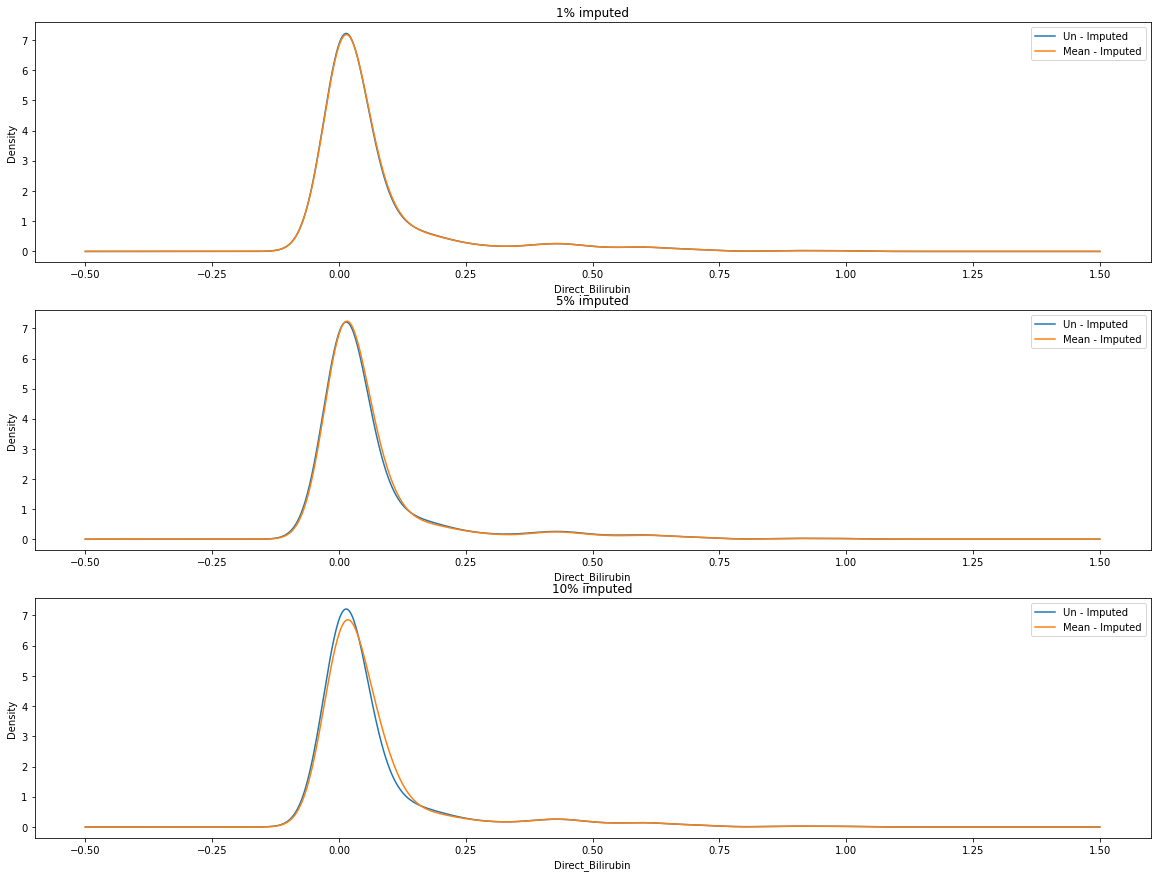

In [ ]:
#1% data
col = 'Direct_Bilirubin'
plt.figure(figsize=(20,15))

# for i, col in enumerate(cols):
plt.subplot(3,1,1)
f_data[col].plot(kind="kde")
nan_1p_df_mean[col].plot(kind="kde")
plt.title('1% imputed')
plt.legend(["Un - Imputed", "Mean - Imputed"])
plt.xlabel(f"{col}")



#5% data
# plt.figure(figsize=(20,15))

# for i, col in enumerate(cols):
plt.subplot(3,1,2)
f_data[col].plot(kind="kde")
nan_5p_df_mean[col].plot(kind="kde")
plt.title('5% imputed')
plt.legend(["Un - Imputed", "Mean - Imputed"])
plt.xlabel(f"{col}")


#10% data
# plt.figure(figsize=(20,15))

# for i, col in enumerate(cols):
plt.subplot(3,1,3)
f_data[col].plot(kind="kde")
nan_10p_df_mean[col].plot(kind="kde")
plt.title('10% imputed')
plt.legend(["Un - Imputed", "Mean - Imputed"])
plt.xlabel(f"{col}")

Text(0.5, 0, 'Direct_Bilirubin')

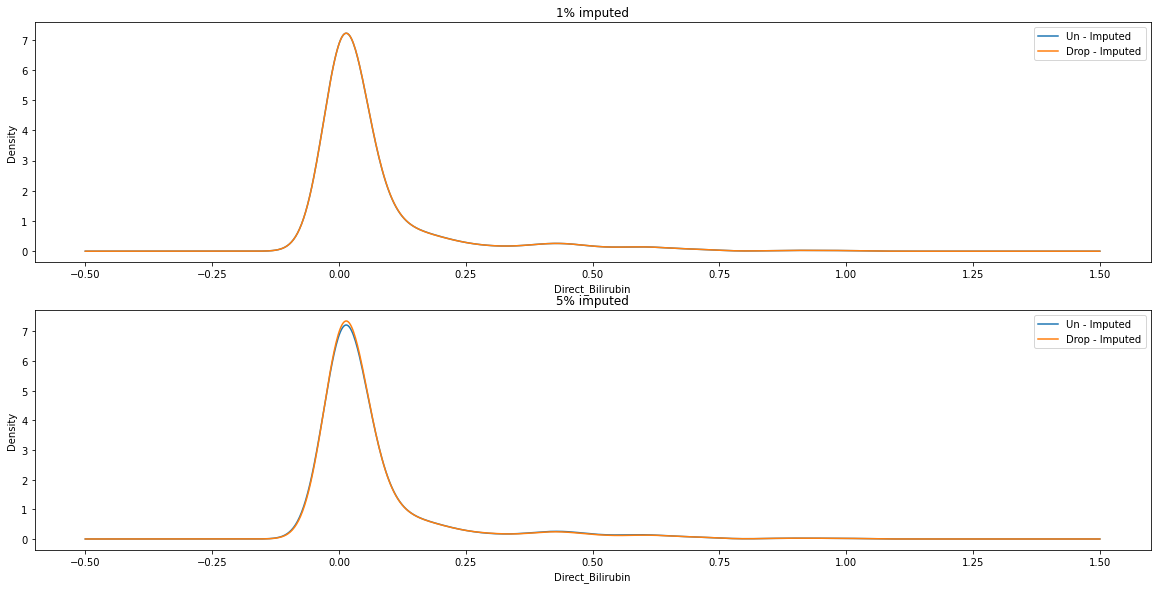

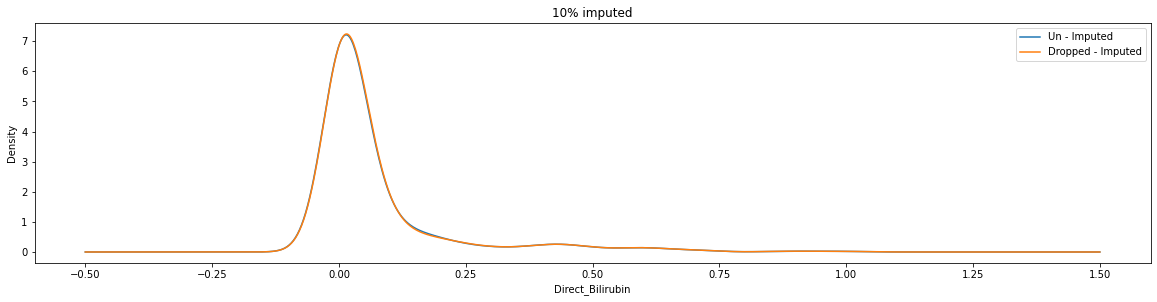

In [ ]:
#KNN imputation density plots

#1% data
col = 'Direct_Bilirubin'

plt.figure(figsize=(20,15))

# i = 0
# for col in cols[:]:
plt.subplot(3,1,1)
i+=1
f_data[col].plot(kind="kde")
nan_1p_df_knn[col].plot(kind="kde")
plt.title('1% imputed')
plt.legend(["Un - Imputed", "Drop - Imputed"])
plt.xlabel(f"{col}")



#5% data
# plt.figure(figsize=(20,15))
# i = 0
# for col in cols[:]:
plt.subplot(3,1,2)
# i+=1
f_data[col].plot(kind="kde")
nan_5p_df_knn[col].plot(kind="kde")
plt.title('5% imputed')
plt.legend(["Un - Imputed", "Drop - Imputed"])
plt.xlabel(f"{col}")


#10% data
plt.figure(figsize=(20,15))

# i = 0
# for col in cols[:]:
plt.subplot(3,1,3)
# i+=1
f_data[col].plot(kind="kde")
nan_10p_df_knn[col].plot(kind="kde")
plt.title('10% imputed')
plt.legend(["Un - Imputed", "Dropped - Imputed"])
plt.xlabel(f"{col}")

In [ ]:
f_data = f_data.dropna()
X = f_data.drop(columns=["Dataset"])
y = f_data['Dataset']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Text(0.5, 0, 'Direct_Bilirubin')

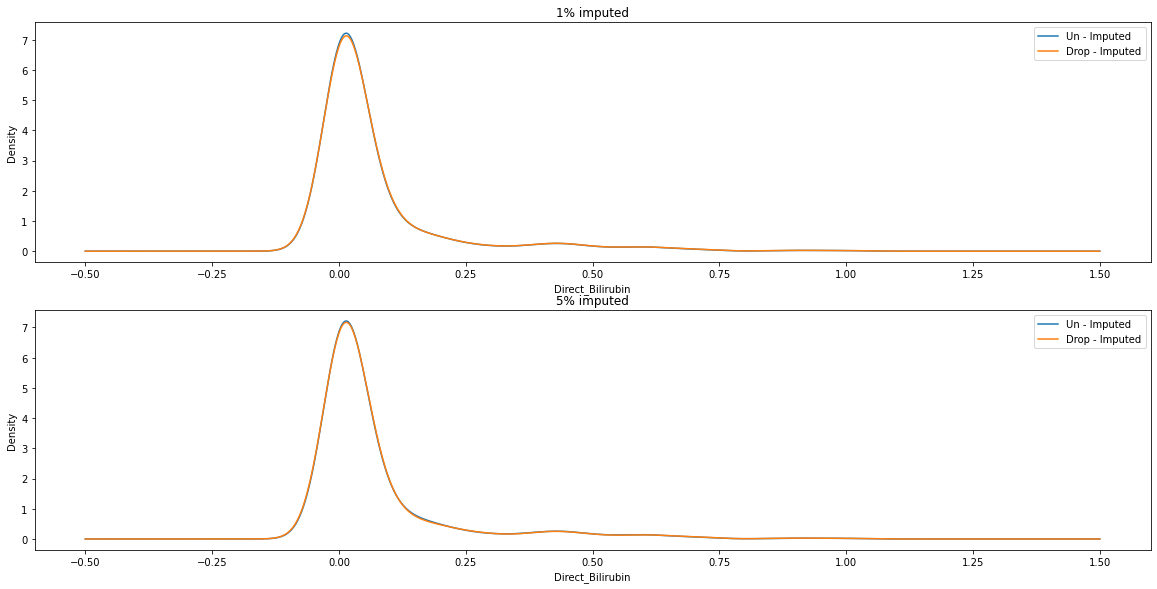

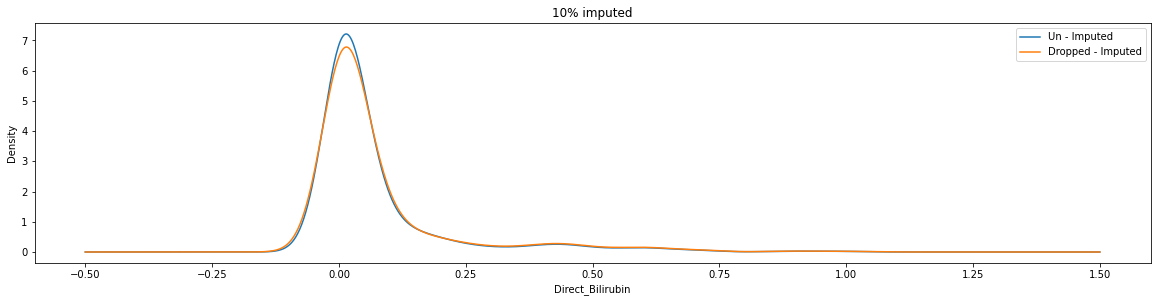

In [ ]:
#Dropped imputation density plots

#1% data
col = 'Direct_Bilirubin'

plt.figure(figsize=(20,15))

# i = 0
# for col in cols[:]:
plt.subplot(3,1,1)
i+=1
f_data[col].plot(kind="kde")
nan_1p_df_drop[col].plot(kind="kde")
plt.title('1% imputed')
plt.legend(["Un - Imputed", "Drop - Imputed"])
plt.xlabel(f"{col}")



#5% data
# plt.figure(figsize=(20,15))
# i = 0
# for col in cols[:]:
plt.subplot(3,1,2)
# i+=1
f_data[col].plot(kind="kde")
nan_5p_df_drop[col].plot(kind="kde")
plt.title('5% imputed')
plt.legend(["Un - Imputed", "Drop - Imputed"])
plt.xlabel(f"{col}")


#10% data
plt.figure(figsize=(20,15))


plt.subplot(3,1,3)
# i+=1
f_data[col].plot(kind="kde")
nan_10p_df_drop[col].plot(kind="kde")
plt.title('10% imputed')
plt.legend(["Un - Imputed", "Dropped - Imputed"])
plt.xlabel(f"{col}")

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
clf.score(X_test, y_test)

0.6705882352941176

Questions and Answers

Q: What are the data types? (Only numeric and categorical

Ans: For the given dataset all the variables are converted to numerical and categorical type. These are most preferable types as the model works best for those data types.

Q. Are there missing values?
Ans: There are no missing values for this dataset.

Q. What are the likely distributions of the numeric variables?
Ans: When graph and q-q plot was plotted for these variables, it was observed that they roughly follow normal distribution curve.

Q.Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)
Ans: Three methods use to determine which variables are important for prediction are correlation matrix, calculating p-value and plotting independent variable against target variable.

Q. Are the predictor variables independent of all the other predictor variables?
No, all predictor variables are not independent of all other predictor variables. From correlation matrix it can be observed that there is multicollinearity among independent variables. Even when pair plot was plotted some plots showed dependency on other predictor variables.

* Which independent variables are useful to predict a target (dependent variable)?
* Which independent variable have missing data? How much?
* Do the training and test sets have the same data?
* In the predictor variables independent of all the other predictor variables?
* Which predictor variables are the most important?
* Do the ranges of the predictor variables make sense?
* What are the distributions of the predictor variables?


* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

